### exploration des données

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np
import random
import matplotlib.image as mpimg

In [2]:
# Variables:
yes_class_path = "../dataset/yes/"
no_class_path = "../dataset/no/"

{'yes_class': 155, 'no_class': 98}


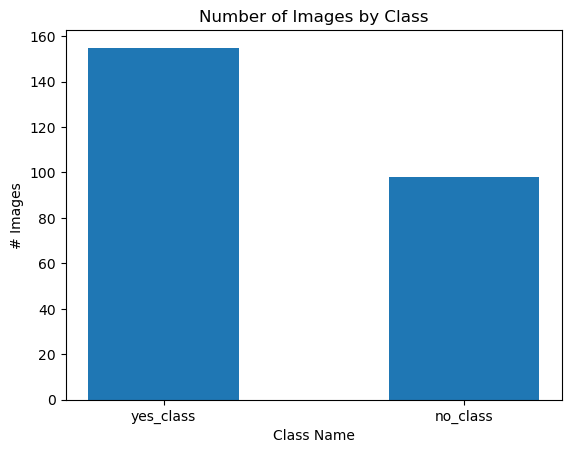

In [3]:
#   Class Imbalance
number_classes = {'yes_class': len(os.listdir(path='../dataset/yes/')), 'no_class': len(os.listdir(path='../dataset/no/'))}
print(number_classes)
plt.bar(number_classes.keys(), number_classes.values(), width = .5)
plt.title("Number of Images by Class")
plt.xlabel('Class Name')
plt.ylabel('# Images')
plt.show()
plt.close()

In [4]:
#   Taille de l'image
yes_dataset = os.listdir(path=yes_class_path)
no_dataset = os.listdir(path=no_class_path)
yes_img_size = []
no_img_size = []
for img in yes_dataset:
    path = yes_class_path + img
    st_Image = Image.open(path)
    img_heigth = st_Image.height
    img_width = st_Image.width
    yes_img_size.append([img_width, img_heigth])
for img in no_dataset:
    path = no_class_path + img
    st_Image = Image.open(path)
    img_heigth = st_Image.height
    img_width = st_Image.width
    no_img_size.append([img_width, img_heigth])


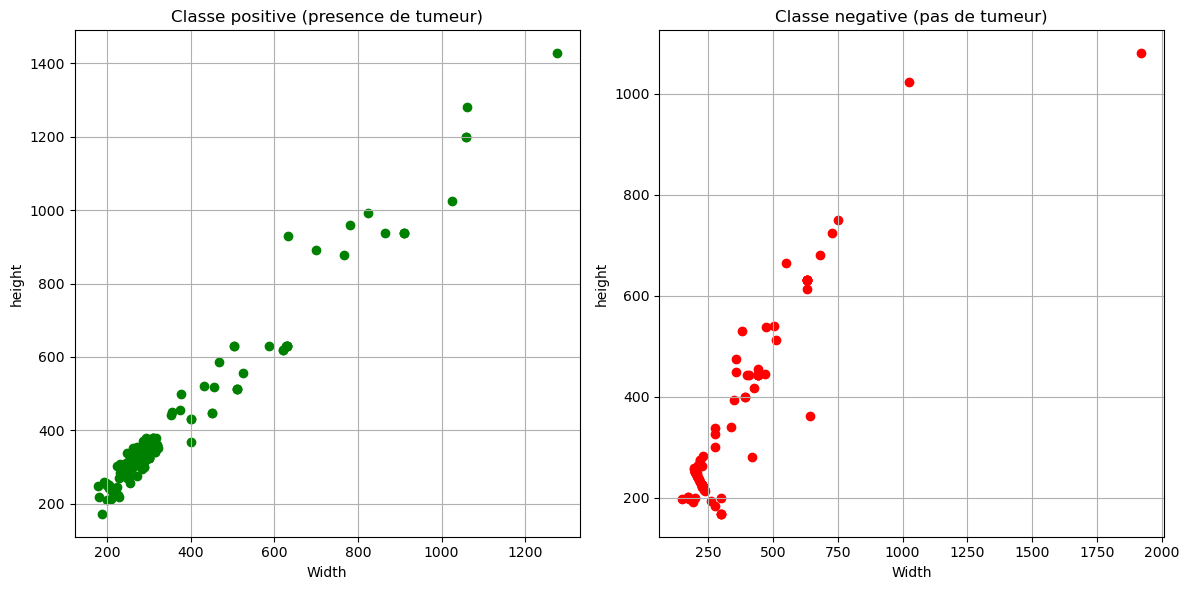

In [5]:
#   Affichage de la distribution de la taille des images
yes_x = [pair[0] for pair in yes_img_size]
yes_y = [pair[1] for pair in yes_img_size]
no_x = [pair[0] for pair in no_img_size]
no_y = [pair[1] for pair in no_img_size]

# Créer le scatter plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 ligne, 2 colonnes
# Scatter plot pour la classe 0
axes[0].scatter(yes_x, yes_y, color='green', label='Classe positive: presence de tumeur')
axes[0].set_title('Classe positive (presence de tumeur)')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('height')
axes[0].grid(True)

# Scatter plot pour la classe 1
axes[1].scatter(no_x, no_y, color='red', label='Classe negative: (pas de tumeur)')
axes[1].set_title('Classe negative (pas de tumeur)')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('height')
axes[1].grid(True)

# Afficher le tout
plt.tight_layout()
plt.show()

In [6]:
#   Analyse de Nombre de canaux de la classe positive
positiv_nbr_canal = {'L': 0, 'RGB': 0, 'RGBA': 0}
imgs = os.listdir(yes_class_path)
for img in imgs:
    img = Image.open(yes_class_path + img)
    if len(img.getbands()) == 1:
        positiv_nbr_canal['L']+=1
    elif len(img.getbands()) == 3:
        positiv_nbr_canal['RGB']+=1
    elif len(img.getbands()) == 4:
        positiv_nbr_canal['RGBA']+=1
        
positiv_nbr_canal

{'L': 17, 'RGB': 138, 'RGBA': 0}

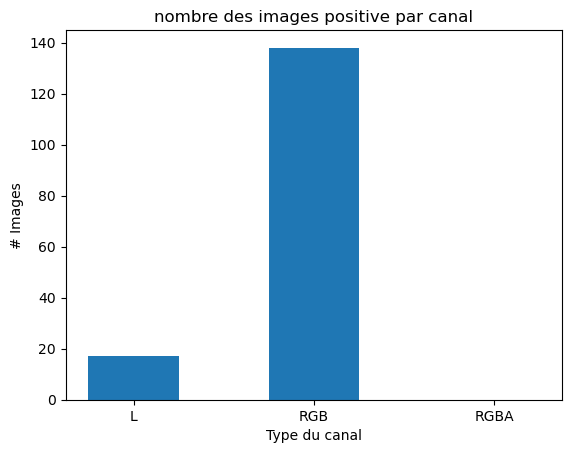

In [7]:
# Affichage de la distribution de Nombre de canaux de la classe positive
plt.bar(positiv_nbr_canal.keys(), positiv_nbr_canal.values(), width = .5)
plt.title("nombre des images positive par canal")
plt.xlabel('Type du canal')
plt.ylabel('# Images')
plt.show()
plt.close()

In [8]:
#   Analyse de Nombre de canaux de la classe negative
negative_nbr_canal = {'L': 0, 'RGB': 0, 'RGBA': 0}
imgs = os.listdir(no_class_path)
for img in imgs:
    img = Image.open(no_class_path + img)
    if len(img.getbands()) == 1:
        negative_nbr_canal['L']+=1
    elif len(img.getbands()) == 3:
        negative_nbr_canal['RGB']+=1
    elif len(img.getbands()) == 4:
        negative_nbr_canal['RGBA']+=1
        
negative_nbr_canal

{'L': 14, 'RGB': 79, 'RGBA': 5}

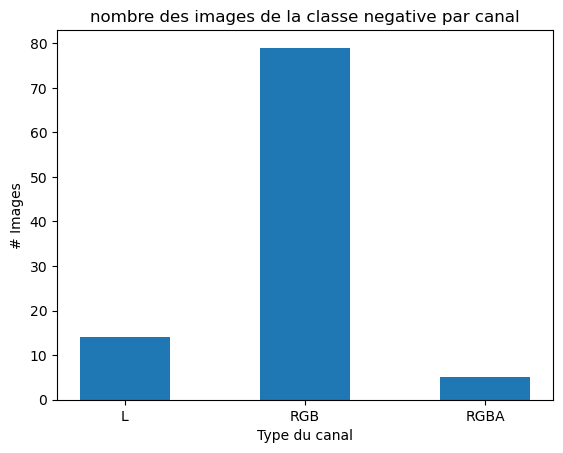

In [9]:
# Affichage de la distribution de Nombre de canaux de la classe negative
plt.bar(negative_nbr_canal.keys(), negative_nbr_canal.values(), width = .5)
plt.title("nombre des images de la classe negative par canal")
plt.xlabel('Type du canal')
plt.ylabel('# Images')
plt.show()
plt.close()

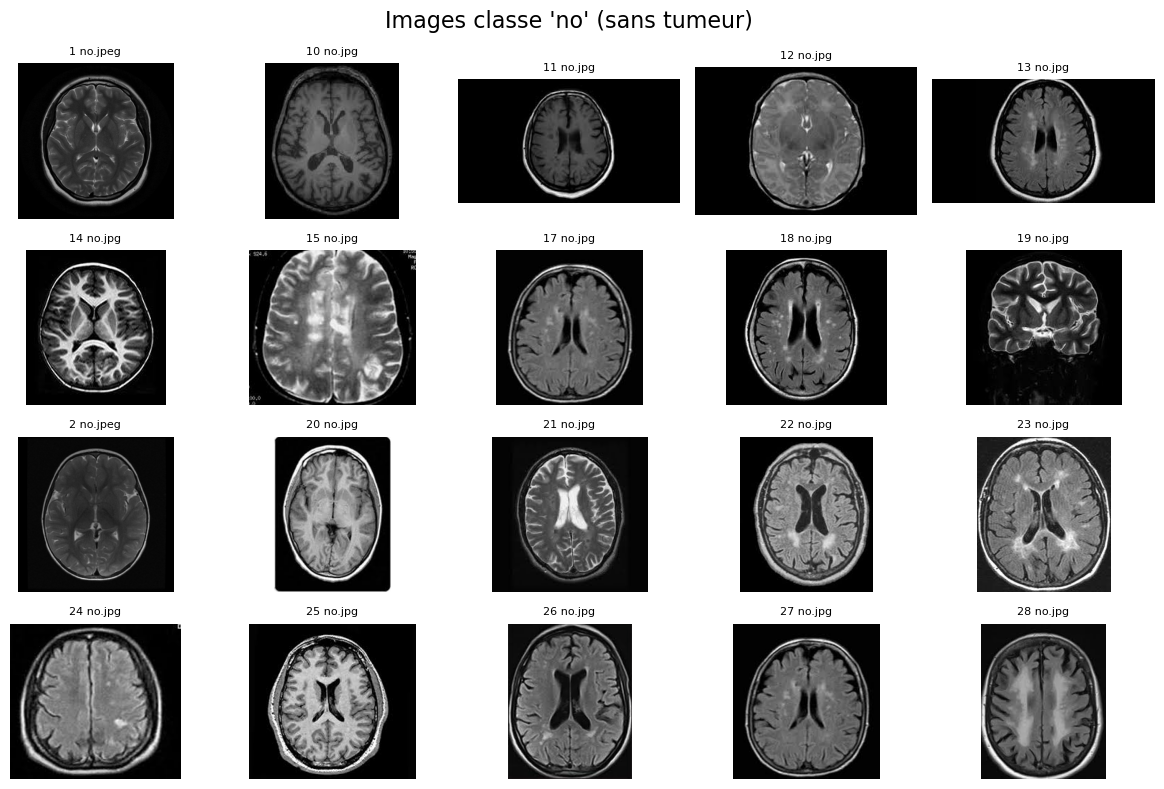

In [10]:
#   affichage aléatoire des images de la classe negative:
no_imgs_path = '../dataset/no/'
no_imgs = os.listdir(no_imgs_path)
fig, axs = plt.subplots(4, 5, figsize=(12, 8))
fig.suptitle("Images classe 'no' (sans tumeur)", fontsize=16)
axes_rows = axs.shape[0]
axes_cols = axs.shape[1]
idx = 0
for row in range(axes_rows):
    for col in range(axes_cols):
        img = mpimg.imread(no_imgs_path + no_imgs[idx])
        axs[row, col].imshow(img, cmap='gray')
        axs[row, col].axis('off')
        axs[row, col].set_title(no_imgs[idx], fontsize=8)
        idx +=1
plt.tight_layout()
plt.show()

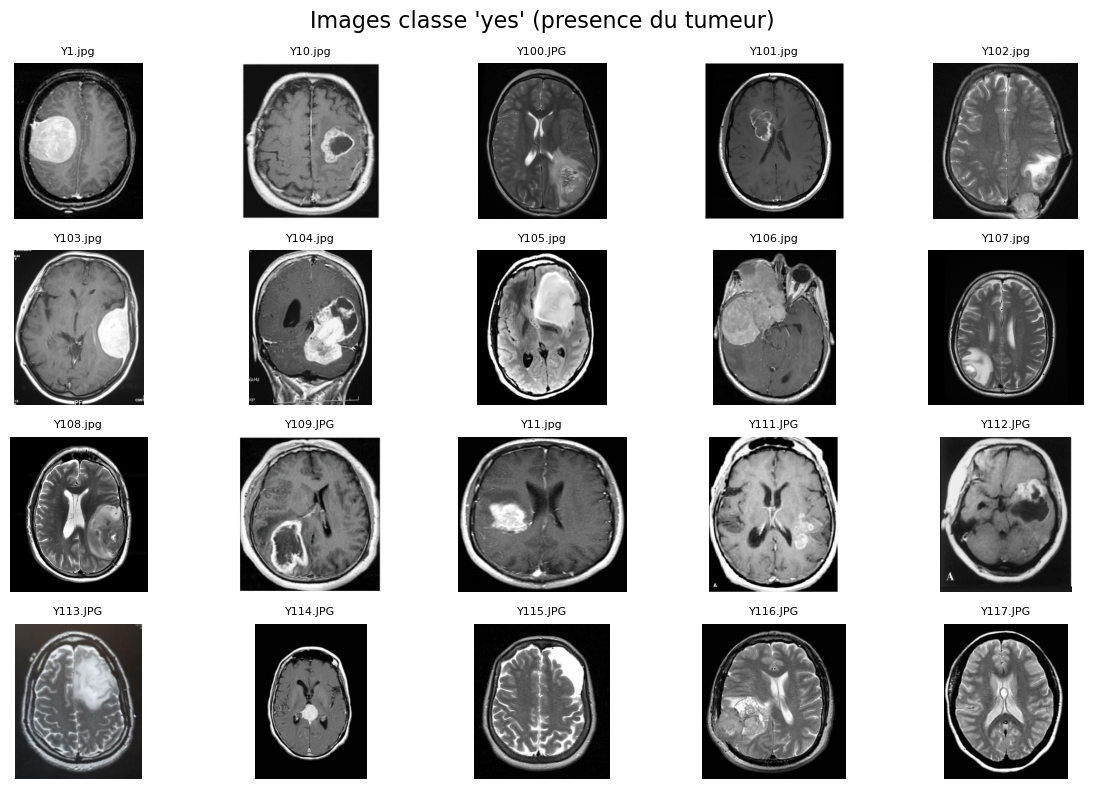

In [11]:
#   affichage aléatoire des images de la classe positive:
no_imgs_path = '../dataset/yes/'
no_imgs = os.listdir(no_imgs_path)
fig, axs = plt.subplots(4, 5, figsize=(12, 8))
fig.suptitle("Images classe 'yes' (presence du tumeur)", fontsize=16)
axes_rows = axs.shape[0]
axes_cols = axs.shape[1]
idx = 0
for row in range(axes_rows):
    for col in range(axes_cols):
        img = mpimg.imread(no_imgs_path + no_imgs[idx])
        axs[row, col].imshow(img, cmap='gray')
        axs[row, col].axis('off')
        axs[row, col].set_title(no_imgs[idx], fontsize=8)
        idx +=1
plt.tight_layout()
plt.show()